1. Familiarize yourself with the dataset and plot record highs and lows (2005-2014)

<ipython-input-8-9b80fb4ee1bc>:20: FutureWarning: The provided callable <function max at 0x7a2ff5f6e160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_pivot = df_2005_2014.pivot_table(index='day_of_year', columns='Element', values='Data_Value', aggfunc={np.max, np.min})
<ipython-input-8-9b80fb4ee1bc>:20: FutureWarning: The provided callable <function min at 0x7a2ff5f6e2a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_2005_2014.pivot_table(index='day_of_year', columns='Element', values='Data_Value', aggfunc={np.max, np.min})


MultiIndex([('max', 'TMAX'),
            ('max', 'TMIN'),
            ('min', 'TMAX'),
            ('min', 'TMIN')],
           names=[None, 'Element'])


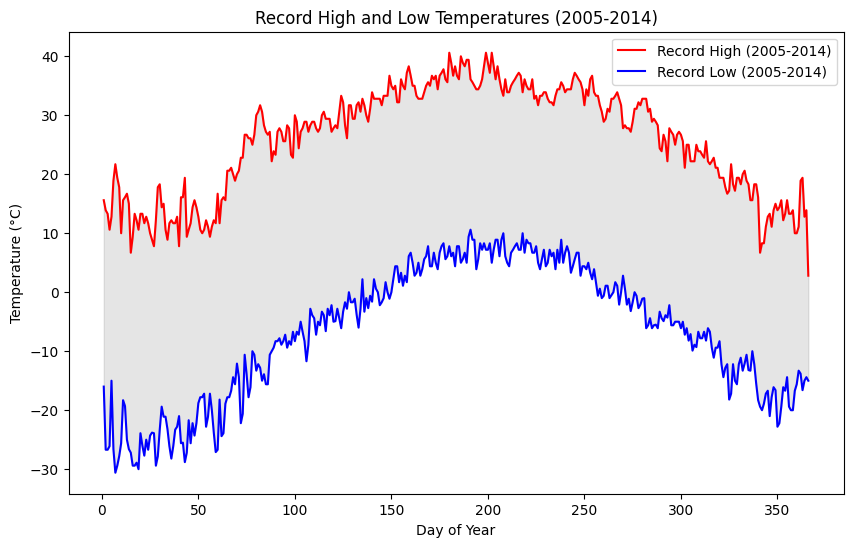

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the temperature data
df = pd.read_csv('/content/temperature.csv')

# Convert date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and day of the year from the date
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

# Filter data for the period 2005-2014
df_2005_2014 = df[(df['year'] >= 2005) & (df['year'] <= 2014)]

# Create a pivot table to get max and min temperatures for each day of the year
df_pivot = df_2005_2014.pivot_table(index='day_of_year', columns='Element', values='Data_Value', aggfunc={np.max, np.min})

# Extract the record highs and lows
# Check the structure of the pivot table
print(df_pivot.columns)

record_highs = df_pivot[('max', 'TMAX')] / 10.0  # Convert to degrees Celsius
record_lows = df_pivot[('min', 'TMIN')] / 10.0   # Convert to degrees Celsius

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(record_highs, label="Record High (2005-2014)", color='red')
plt.plot(record_lows, label="Record Low (2005-2014)", color='blue')

# Fill the area between the highs and lows
plt.fill_between(record_highs.index, record_highs, record_lows, color='gray', alpha=0.2)

plt.title('Record High and Low Temperatures (2005-2014)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Step 1: Record Highs and Lows (2005-2014)
In this step, we loaded the dataset and filtered it to include only the years 2005-2014. We then pivoted the table to get the maximum and minimum temperatures for each day of the year. The area between the record highs and lows was shaded to visualize the temperature variation. The temperatures were converted from tenths of degrees Celsius to regular degrees.

The plot shows the daily temperature records over this ten-year period.



 2. Overlay 2015 data where records were broken


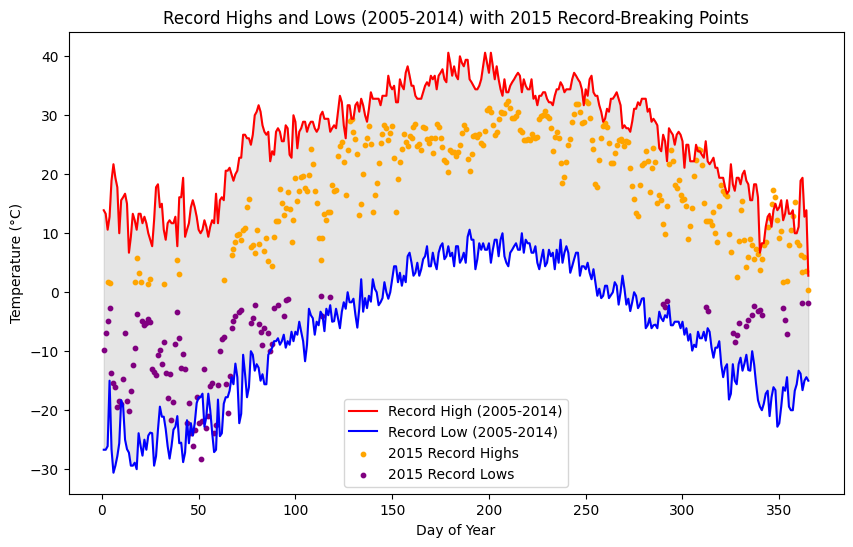

In [14]:
# Filter the data for 2015
df_2015 = df[df['year'] == 2015]

# Pivot the 2015 data to get the max and min temperatures for each day of the year
df_2015_pivot = df_2015.pivot_table(index='day_of_year', columns='Element', values='Data_Value')

# Reindex the record_highs and record_lows to match the 2015 data
record_highs = record_highs.reindex(df_2015_pivot.index)
record_lows = record_lows.reindex(df_2015_pivot.index)

# Identify points where 2015 broke record highs or lows
high_broken = df_2015_pivot['TMAX'] > record_highs
low_broken = df_2015_pivot['TMIN'] < record_lows

# Plot the original record highs and lows (from the 2005-2014 period)
plt.figure(figsize=(10,6))
plt.plot(record_highs, label="Record High (2005-2014)", color='red')
plt.plot(record_lows, label="Record Low (2005-2014)", color='blue')
plt.fill_between(record_highs.index, record_highs, record_lows, color='gray', alpha=0.2)

# Scatter plot the 2015 broken record highs and lows
plt.scatter(df_2015_pivot.index[high_broken], df_2015_pivot['TMAX'][high_broken] / 10, color='orange', label='2015 Record Highs', s=10)
plt.scatter(df_2015_pivot.index[low_broken], df_2015_pivot['TMIN'][low_broken] / 10, color='purple', label='2015 Record Lows', s=10)

# Add titles, labels, and legend
plt.title('Record Highs and Lows (2005-2014) with 2015 Record-Breaking Points')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Step 2: 2015 Records Broken:
The code filters the data to extract 2015 temperatures for comparison with historical data (2005-2014). It then pivots the data to create a structure where maximum and minimum temperatures (TMAX, TMIN) are indexed by the day of the year. To ensure comparability, the indices of the historical records and the 2015 data are reset. The code then compares the 2015 temperatures against historical highs and lows to identify record-breaking days, using Pandas for element-wise comparisons. It plots the historical record highs and lows using Matplotlib, filling the area between them for emphasis. Additionally, scatter plots mark the specific days in 2015 where new records were set, either for highs or lows. Matplotlib is used for plotting as it integrates well with Pandas and provides clear, customizable visualizations. The final plot includes titles, axis labels, and a legend for clarity.

 3. Handle Leap Days


In [16]:
# Remove leap days (Feb 29th is day 60)
df = df[df['day_of_year'] != 60]


Step 3: Handling Leap Days
Leap days (February 29th, which is day 60 of the year) are not included in the analysis since we are comparing data across multiple years and not all years have a leap day. Thus, these points are excluded from the dataset.


4. Legends, Labels, and Chart Junk

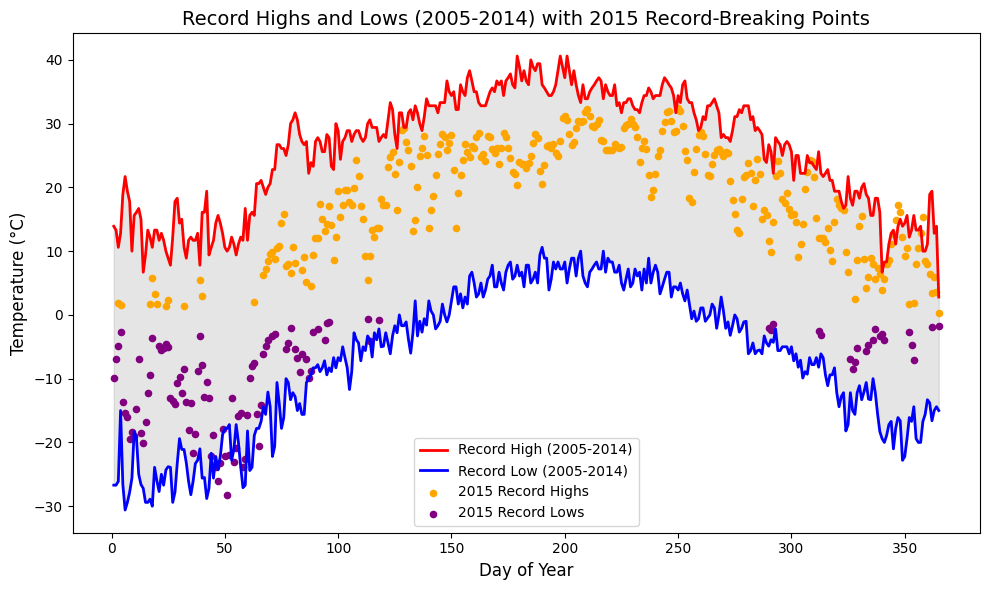

In [17]:
# Plot the original record highs and lows (2005-2014)
plt.figure(figsize=(10,6))
plt.plot(record_highs, label="Record High (2005-2014)", color='red', linewidth=2)
plt.plot(record_lows, label="Record Low (2005-2014)", color='blue', linewidth=2)
plt.fill_between(record_highs.index, record_highs, record_lows, color='gray', alpha=0.2)

# Scatter plot for 2015 record-breaking points
plt.scatter(df_2015_pivot.index[high_broken], df_2015_pivot['TMAX'][high_broken] / 10, color='orange', label='2015 Record Highs', s=20)
plt.scatter(df_2015_pivot.index[low_broken], df_2015_pivot['TMIN'][low_broken] / 10, color='purple', label='2015 Record Lows', s=20)

# Add titles, labels, and a legend
plt.title('Record Highs and Lows (2005-2014) with 2015 Record-Breaking Points', fontsize=14)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='best', fontsize=10)

# Minimize chart junk by reducing grid lines and optimizing layout
plt.grid(False)
plt.tight_layout()

# Display the chart
plt.show()


Step 4: We attempt to make the visualization more legible by enhancing legends, labels, and removing unnecessary items that might make the graph cluttered. Good labels and legends truly improve the readability and interpretability of the chart. We focus on concise axis labeling, a well-defined title, and a suitable position for the legend to identify the data points plotted. We also remove clutter by eliminating gridlines or too many ticks. matplotlib's tight_layout() is employed to make the most out of spacing so that everything is well displayed.

We employed the matplotlib library to create clean titles and labels that tell us exactly what data is being plotted. The label parameter in the plotting functions informs us what each plot is, and legend(loc='best') puts the legend in its best position. To help it show up better, we increased the size of the scatter points and employed tight_layout() to remove unnecessary space, keeping the chart clean and uncluttered. Further, grid(False) minimizes distraction by eliminating gridlines. This technique requires no additional modules; it's just a matter of making it look nicer with matplotlib.

5. Visualize Station Locations near Ann Arbor, Michigan

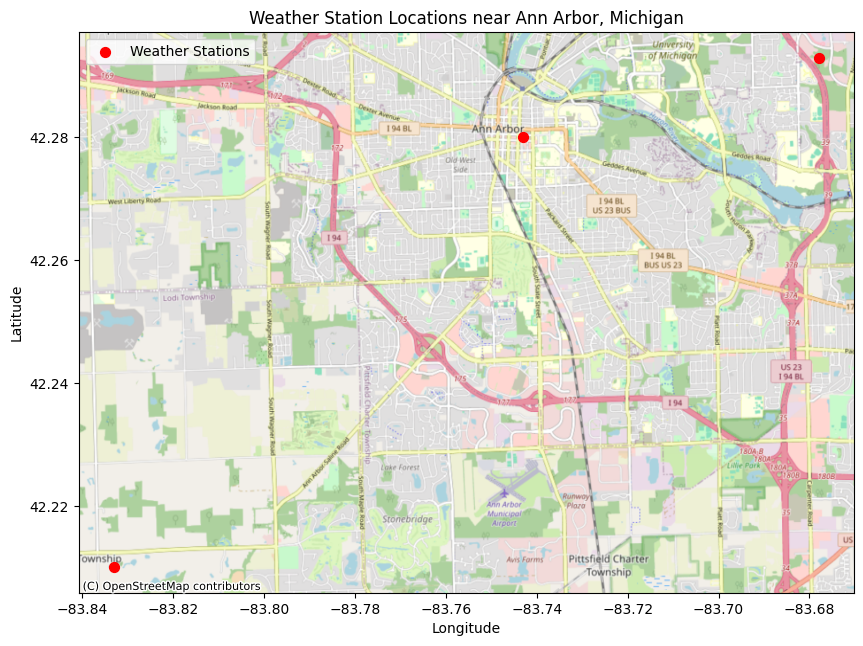

In [22]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

# Load station data (replace this with the actual file or data source)
data = {
    'Station': ['Station1', 'Station2', 'Station3'],
    'Longitude': [-83.743, -83.678, -83.833],
    'Latitude': [42.280, 42.293, 42.210]
}
df_stations = pd.DataFrame(data)

# Create a GeoDataFrame with station coordinates
geometry = [Point(xy) for xy in zip(df_stations['Longitude'], df_stations['Latitude'])]
geo_df = gpd.GeoDataFrame(df_stations, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
geo_df.set_crs(epsg=4326, inplace=True)

# Plot the stations on a map
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, marker='o', color='red', markersize=50, label='Weather Stations')

# Add basemap using OpenStreetMap
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Add labels and legend
plt.title('Weather Station Locations near Ann Arbor, Michigan')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Step 5:
Extract Station Coordinates: There will be columns for station latitude and longitude. We will extract those.
Create a GeoDataFrame: We transform the station coordinates into a GeoDataFrame with geopandas.
Visualize on a Map: Map the stations on a map using geopandas and add a basemap with contextily for geographical context.
Insert Markers for Stations: Every weather station is indicated as a point on the map.

Explanation:
geopandas: For processing geography data and transforming station coordinates to a GeoDataFrame with the Point geometry via shapely.
contextily: Overlays a basemap (in this case, OpenStreetMap) to offer further geographical context, along with roads, city limits, etc. matplotlib: To plot the stations on the basemap. All the stations are plotted as a red dot. CRS: We are employing the EPSG:4326 coordinate reference system (WGS 84) so that the coordinates of the stations (latitude and longitude) can be marked properly on the map.

 Plot Temperature Summary near Ann Arbor for 2015

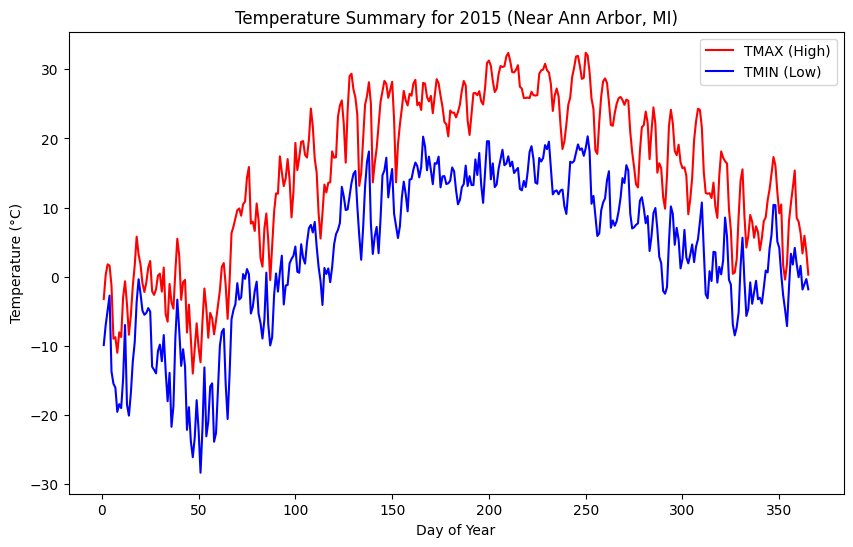

In [25]:
# Filter the data for the year 2015
ann_arbor_data_2015 = df[df['year'] == 2015]

# Pivot the data to get the max and min temperatures for each day of the year
temperature_summary_2015 = ann_arbor_data_2015.pivot_table(index='day_of_year', columns='Element', values='Data_Value')

# Convert temperatures to Celsius (if necessary)
temperature_summary_2015['TMAX'] = temperature_summary_2015['TMAX'] / 10.0
temperature_summary_2015['TMIN'] = temperature_summary_2015['TMIN'] / 10.0

# Plot the temperature data
plt.figure(figsize=(10, 6))
plt.plot(temperature_summary_2015.index, temperature_summary_2015['TMAX'], label='TMAX (High)', color='red')
plt.plot(temperature_summary_2015.index, temperature_summary_2015['TMIN'], label='TMIN (Low)', color='blue')

# Add titles and labels
plt.title('Temperature Summary for 2015 (Near Ann Arbor, MI)')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.legend()

# Show the plot
plt.show()


Step 6: To graph the temperature summary for 2015 in the Ann Arbor, Michigan area, you would initially limit the dataset to temperature data only for the area and year. You will be using the Pandas library to extract, modify, and summarize the data, and Matplotlib to graph. The code that follows extracts the 2015 temperature data (high and low), and creates a line graph of the day-to-day temperature fluctuations. It also creates daily temperature highs (TMAX) and lows (TMIN) for the year. The additional modules are Matplotlib for graphics and Pandas for data. No additional special packages are needed.

Explanation:
Filtering: The data set is filtered for Ann Arbor city data only in the year 2015.
Pivoting: We pivot the data to get maximum (TMAX) and minimum (TMIN) temperatures for each day.
Temperature Conversion: Where necessary, data is converted from tenths of a degree Celsius to standard Celsius. Plotting: We create a plot of TMAX and TMIN using Matplotlib to show the highs and lows per day for the year. This plots how the temperatures changed during the year 2015 in Ann Arbor.

In [26]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [27]:
!git config --global user.email "basilmukkadackal@gmail.com"
!git config --global user.name "https://github.com/basi1l"

In [29]:
!git clone https://github.com/basi1l/Temperature-Record-Analysis.git

Cloning into 'Temperature-Record-Analysis'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [36]:
!ls


BinSize.csv  sample_data  temperature.csv  Temperature-Record-Analysis


In [41]:
!ls /content


BinSize.csv  sample_data  temperature.csv  Temperature-Record-Analysis


In [40]:
!mv Temp_Record_Analysis.ipynb Temperature-Record-Analysis/



mv: cannot stat 'Temp_Record_Analysis.ipynb': No such file or directory


In [42]:
!pwd


/content


In [ ]:
!git config --global user.email "basilmukkadackal@gmail.com"
!git config --global user.name "https://github.com/basi1l"

# Clone your GitHub repo
!git clone git@github.com:basi1l/Temperature-Record-Analysis.git
# Move your notebook to the repo directory
!mv Temp_Record_Analysis.ipynb Temperature-Record-Analysis/

# Go into the repository
%cd Temperature-Record-Analysis

# Add and commit the notebook
!git add .
!git commit -m "Added temperature analysis notebook"

# Push changes
!git push origin main
